## Учебный проект EDA для предсказания оценки студента на экзамене
Предполагаем, что учебный проект - это один из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Чтобы определиться с параметрами будущей модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы, необходимо провести разведывательный анализ данных и составить отчёт по его результатам.

### Цель проекта:
определить параметры (количественные и номинативные), которые оказывают наибольшее влияние на целевой параметр.

### Задачи проекта:
 - Провести первичную обработку данных;
 - Устранить выбросы;
 - Провести корреляционный анализ количественных переменных;
 - Проанализировать номинативные переменные;
 - Отобрать параметры с наибольшим влиянием на целевой;
 - Сформулировать выводы.

## Блок предообработки

Импорт необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import combinations
from scipy.stats import ttest_ind

Создадим необходимые функции.

In [15]:
def plot_bar(column, column_title):
    '''Функция принимает на вход столбец датафрейма и строит столбчатую диаграмму распределения признака'''
    
    column.value_counts().plot(kind='bar',
                               grid = True, 
                               colormap = 'coolwarm', 
                               title = column_title)

In [16]:
def plot_bar_sort(column, column_title):
    '''Функция принимает на вход столбец датафрейма и строит столбчатую диаграмму распределения признака,
    сортируя записи в алфавитном порядке'''
   
    column.value_counts().sort_index(ascending=True).plot(kind='bar',
                                                          grid = True, 
                                                          colormap = 'coolwarm', 
                                                          title = column_title)

In [4]:
def percent_nan(column):
    '''Функция принимает на вход столбец датафрейма и считает процент пропусков в нем'''
    
    percent_nan = round(len(students[pd.isnull(column)])/len(column)*100,2) #расчет доли и перевод ее в %
    print(f'Пропусков {percent_nan}%')

In [77]:
def fillna_mode(column):
    '''Функция принимает на вход столбец датафрейма и заменяет все пропуски в нем на модальное значение
    этого столбца'''
    return column.fillna(column.mode()[0])

In [68]:
def get_boxplot(column):
    '''Функция принимает на вход столбец датафрейма и строит boxplot для него и целевого параметра score'''
    sns.boxplot(x=column, y='score',data = students)
    plt.show()

In [71]:
def get_stat_dif(column):
    '''Функция определяет, есть ли статистическая разница в распределении оценок по номинативным признакам, 
    с помощью теста Стьюдента'''
    cols = students.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки', column)
            break

## Загрузка и первичный анализ данных

In [84]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

display(students.head(20))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

На первый взгляд, проблем с типами данных нет. 
Рассмотрим каждый столбец подробнее. Также рассмотрим процент пропусков в них. Если пропусков будет меньше 10%, тогда ничего делать с ними не будем, если больше - будем заменять или удалять.

## school
Аббревиатура школы, в которой учится ученик. Содержит 395 ненулевых значений (заполнено полностью).

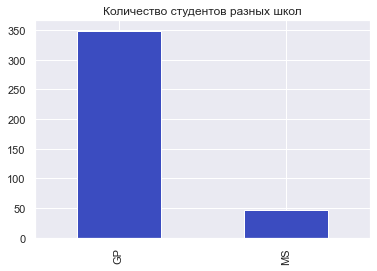

In [125]:
plot_bar(students.school, 'Количество студентов разных школ')

В датасете представлены выпускники двух школ, причем GP в значительно большем количестве.

## sex
Пол ученика ('F' - женский, 'M' - мужской). Содержит 395 ненулевых значений (заполнено полностью).

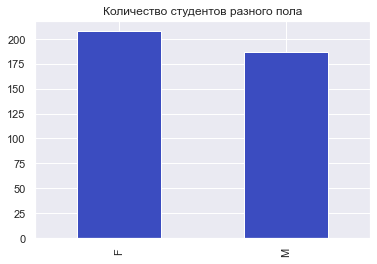

In [126]:
plot_bar(students.sex,'Количество студентов разного пола')

Видим, что количество мальчиков и девочек примерно одинаково.

## age
Возраст ученика (от 15 до 22). Содержит 395 ненулевых значений (заполнено полностью).

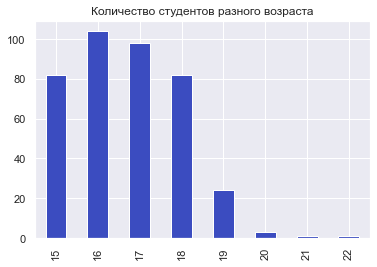

In [127]:
plot_bar_sort(students.age, 'Количество студентов разного возраста')    

In [128]:
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Все студенты примено одного возраста (больших отклонений нет), среднее значение 16 лет.

## address
Тип адреса ученика ('U' - городской, 'R' - за городом)

In [129]:
pd.DataFrame(students.address.value_counts(dropna=False))

,address
U,295
R,83
NaN,17


In [130]:
percent_nan(students.address)

Пропусков 4.3%


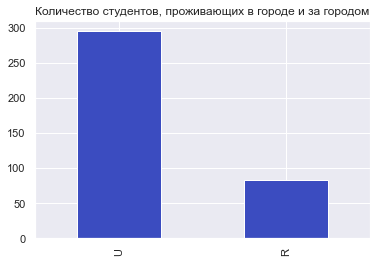

In [131]:
plot_bar(students.address, 'Количество студентов, проживающих в городе и за городом')

В датасете данные о 295 учениках, проживающих в городе, и 83 учениках, проживающих за городом. О проживании 17 учеников данных нет.

## famsize

Размер семьи ученика ('LE3' <= 3, 'GT3' >3)

In [79]:
pd.DataFrame(students.famsize.value_counts(dropna=False))

,famsize
GT3,261
LE3,107
NaN,27


In [133]:
percent_nan(students.famsize)

Пропусков 6.84%


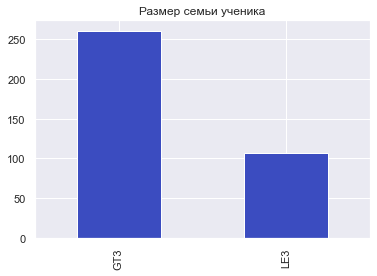

In [134]:
plot_bar(students.famsize, 'Размер семьи ученика')

В датасете данные о 261 ученике из немногодетной семьи и 107 учениках из многодетной семьи. О составе семьи 27 учеников данных нет.

## Pstatus
Статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [85]:
pd.DataFrame(students.Pstatus.value_counts(dropna=False))

,Pstatus
T,314
NaN,45
A,36


In [136]:
percent_nan(students.Pstatus)

Пропусков 11.39%


Пропусков более 10%. Заменим их модальным значением.

In [86]:
students.Pstatus = fillna_mode(students.Pstatus)

In [89]:
pd.DataFrame(students.Pstatus.value_counts(dropna=False))

,Pstatus
T,359
A,36


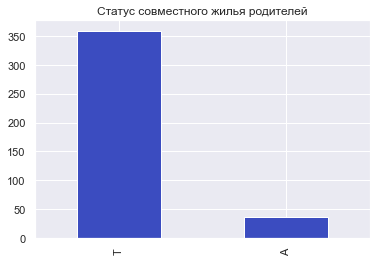

In [17]:
plot_bar(students.Pstatus, 'Статус совместного жилья родителей')

В датасете данные о 314 учениках из полной семьи и 36 учениках из неполной семьи. О составе семьи 45 учеников данных не было, поэтому мы приняли допущение, что они растут в полной семье.

## Medu
Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [138]:
pd.DataFrame(students.Medu.value_counts(dropna=False))

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
NaN,3
0.0,3


In [139]:
percent_nan(students.Medu)

Пропусков 0.76%


Выбросов в данных нет.

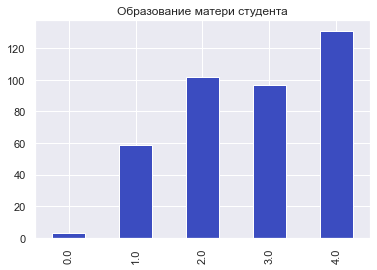

In [140]:
plot_bar_sort(students.Medu, 'Образование матери студента')

Среди матерей студентов преобладают люди с высшим образованием, что говорит в целом о высоком уровне образованности.

## Fedu
Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [141]:
students.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

В данных присутствует один выброс (40.0). Скорее всего, была допущена опечатка, заменим на 4.0. 

In [52]:
students.loc[students.Fedu == 40.0, 'Fedu'] = 4.0
students.Fedu.value_counts(dropna=False)

2.0    106
3.0     96
4.0     89
1.0     78
NaN     24
0.0      2
Name: Fedu, dtype: int64

In [143]:
percent_nan(students.Fedu)

Пропусков 6.08%


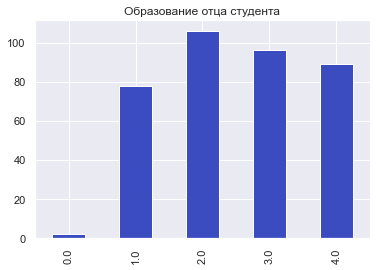

In [144]:
plot_bar_sort(students.Fedu, 'Образование отца студента')

Образование отца в целом ниже образования матери (преобрадает незаконченное среднее). 

## Mjob
Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [145]:
students.Mjob.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

In [146]:
percent_nan(students.Mjob)

Пропусков 4.81%


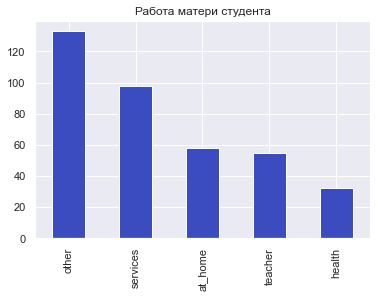

In [147]:
plot_bar(students.Mjob, 'Работа матери студента')

Работа матери преимущественно связана с госслужбой или с профессиями, не вошедшими в опрос.

## Fjob
Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [148]:
students.Fjob.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [149]:
percent_nan(students.Fjob)

Пропусков 9.11%


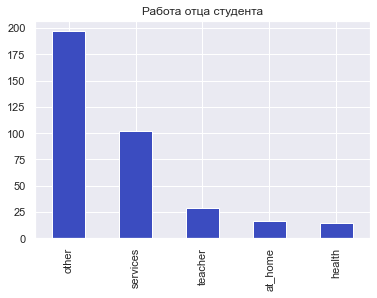

In [150]:
plot_bar(students.Fjob, 'Работа отца студента')

Работа отца, также как и работа матери, преимущественно связана с госслужбой или с профессиями, не вошедшими в опрос.

## reason
Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [151]:
students.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

In [152]:
percent_nan(students.reason)

Пропусков 4.3%


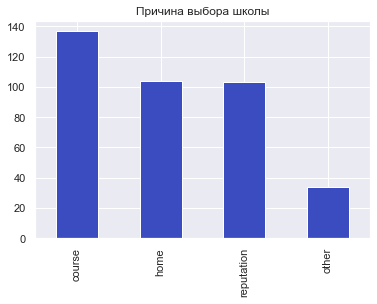

In [153]:
plot_bar(students.reason, 'Причина выбора школы')

В случае выбора школа явной тенденции к чему-либо нет, причины выбора распределились примерно поровну, немного больше голосов за образовательную программу.

## guardian
Опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [154]:
students.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

In [155]:
percent_nan(students.guardian)

Пропусков 7.85%


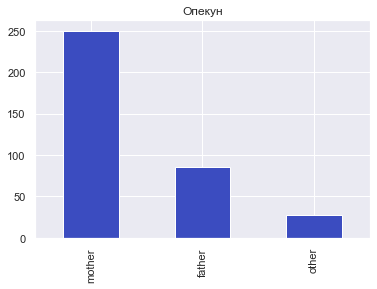

In [156]:
plot_bar(students.guardian,'Опекун')

В случае опекуна явный отрыв в голосах у матери, что вполне ожидаемо.

## traveltime
Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [157]:
students.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [158]:
percent_nan(students.traveltime)

Пропусков 7.09%


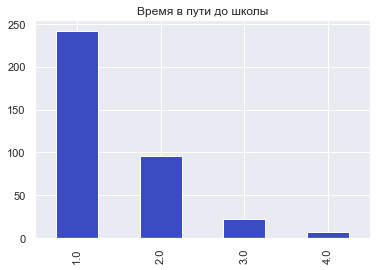

In [159]:
plot_bar_sort(students.traveltime, 'Время в пути до школы')

В основном все ученики живут в непосредственной близости от школы (менее 15 минут), что немного удивительно, учитывая то, что старшую школу выбирают обычно не по расстоянию от дома, а с учетом сильной специализации.

## studytime
Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [160]:
students.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

In [161]:
percent_nan(students.studytime)

Пропусков 1.77%


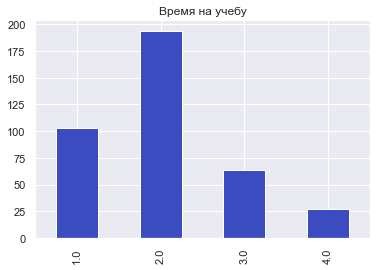

In [162]:
plot_bar_sort(students.studytime, 'Время на учебу')

На домашнее задание ученики тратят в основном 2-5 часов в неделю, что вполне ожидаемо.

## failures
Количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [163]:
students.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [164]:
percent_nan(students.failures)

Пропусков 5.57%


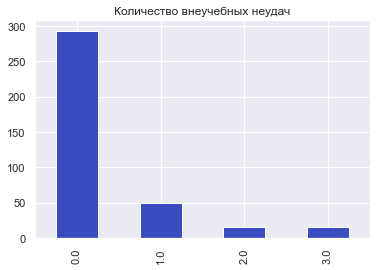

In [165]:
plot_bar_sort(students.failures, 'Количество внеучебных неудач')

Не очень понятно ,что именно имеется в виду под "внеучебными неудачами", но у большинства учащихся их нет.

## schoolsup
Дополнительная образовательная поддержка (yes или no)

In [166]:
students.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [167]:
percent_nan(students.schoolsup)

Пропусков 2.28%


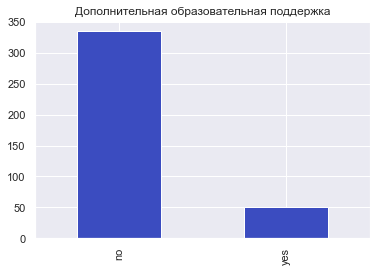

In [168]:
plot_bar(students.schoolsup, 'Дополнительная образовательная поддержка')

В основном, студенты справляются без дополнительной образовательной поддержки.

## famsup
Семейная образовательная поддержка (yes или no)

In [90]:
students.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

In [170]:
percent_nan(students.famsup)

Пропусков 9.87%


Пропусков достаточно много, заменим их модальным значением.

In [91]:
students.famsup = fillna_mode(students.famsup)

In [92]:
students.famsup.value_counts(dropna=False)

yes    258
no     137
Name: famsup, dtype: int64

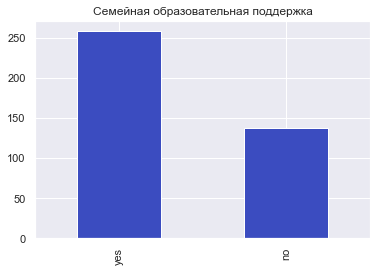

In [32]:
plot_bar(students.famsup, 'Семейная образовательная поддержка')

Здесь напротив, большинство студентов имеют семейную образоватеьную поддержку.

Проанализируем, есть ли связь между дополнительной школьной и семейной образовательной поддержкой (возможно, при наличии одной, другая не нужна и наоборот), чтобы связать их при необходимости в один признак.

In [105]:
students.groupby(by = ['schoolsup'])['famsup'].value_counts()

schoolsup  famsup
no         yes       213
           no        122
yes        yes        40
           no         11
Name: famsup, dtype: int64

Всего 11 человек имеет школьную дополнительную поддержку при отсутствии семейной, очень большое количество при этом дополнительной школьной не имеет, поэтому объединять эти признаки в один не имеет смысла.

## paid
Дополнительные платные занятия по математике (yes или no)

In [93]:
students.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

In [173]:
percent_nan(students.paid)

Пропусков 10.13%


Пропусков достаточно много, заменим их модальным значением.

In [94]:
students.paid = fillna_mode(students.paid)

In [95]:
students.paid.value_counts(dropna=False)

no     240
yes    155
Name: paid, dtype: int64

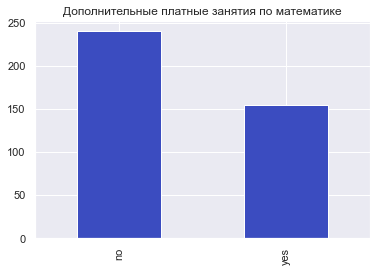

In [50]:
plot_bar(students.paid, 'Дополнительные платные занятия по математике')

Большинство студентов не имеет платных дополнительных уроков по математике.

## activities
Дополнительные внеучебные занятия (yes или no)

In [175]:
students.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

In [176]:
percent_nan(students.activities)

Пропусков 3.54%


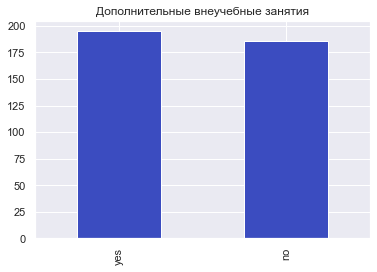

In [177]:
plot_bar(students.activities, 'Дополнительные внеучебные занятия')

## nursery
Посещал детский сад (yes или no)

In [178]:
students.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

In [179]:
percent_nan(students.nursery)

Пропусков 4.05%


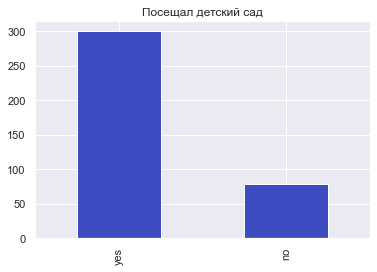

In [180]:
plot_bar(students.nursery, 'Посещал детский сад')

## higher
Хочет получить высшее образование (yes или no)

In [181]:
students.higher.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

In [182]:
percent_nan(students.higher)

Пропусков 5.06%


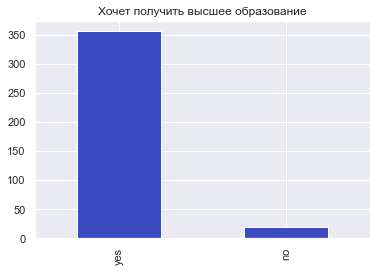

In [183]:
plot_bar(students.higher, 'Хочет получить высшее образование')

## internet
Наличие интернета дома (yes или no)

In [184]:
students.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

In [185]:
percent_nan(students.internet)

Пропусков 8.61%


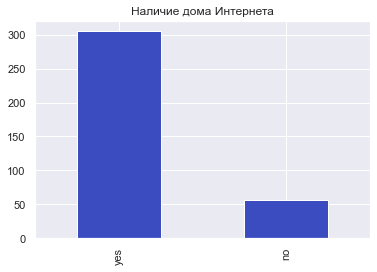

In [186]:
plot_bar(students.internet, 'Наличие дома Интернета')

## romantic
В романтических отношениях (yes или no)

In [187]:
students.romantic.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

In [188]:
percent_nan(students.romantic)

Пропусков 7.85%


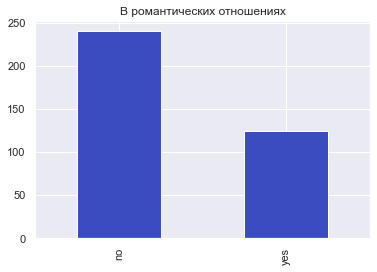

In [189]:
plot_bar(students.romantic, 'В романтических отношениях')

## famrel
Семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [190]:
students.famrel.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Есть одно неожиданное отрицательное значение (-1). Это может быть как опечаткой, так и, например, крайне негативной оценкой семейных отношений. Заменим на положительное число (1).

In [60]:
students.loc[students.famrel == -1.0, 'famrel'] = 1.0
students.famrel.value_counts(dropna=False)

4.0    182
5.0     99
3.0     62
NaN     27
2.0     17
1.0      8
Name: famrel, dtype: int64

In [192]:
percent_nan(students.famrel)

Пропусков 6.84%


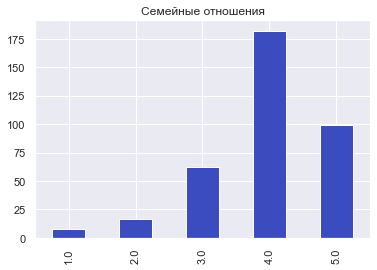

In [193]:
plot_bar_sort(students.famrel, 'Семейные отношения')

## freetime
Свободное время после школы (от 1 - очень мало до 5 - очень много)

In [194]:
students.freetime.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

In [195]:
percent_nan(students.freetime)

Пропусков 2.78%


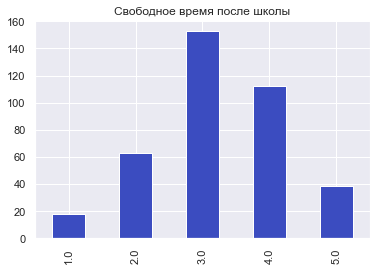

In [196]:
plot_bar_sort(students.freetime, 'Свободное время после школы')

## goout
Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [197]:
students.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

In [198]:
percent_nan(students.goout)

Пропусков 2.03%


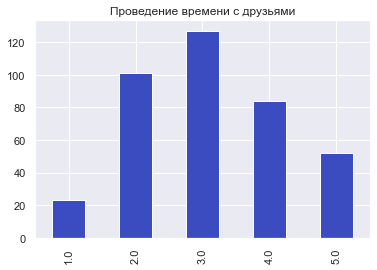

In [199]:
plot_bar_sort(students.goout, 'Проведение времени с друзьями')

## health
Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [200]:
students.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

In [201]:
percent_nan(students.goout)

Пропусков 2.03%


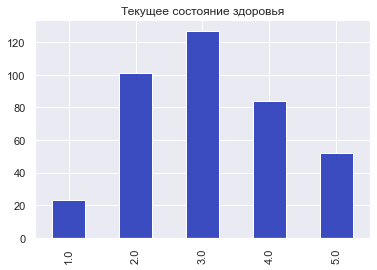

In [202]:
plot_bar_sort(students.goout, 'Текущее состояние здоровья')

## absences
Количество пропущенных занятий

In [203]:
students.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
NaN       12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
11.0       2
15.0       2
56.0       1
24.0       1
23.0       1
25.0       1
19.0       1
17.0       1
75.0       1
21.0       1
212.0      1
26.0       1
30.0       1
40.0       1
28.0       1
385.0      1
38.0       1
54.0       1
Name: absences, dtype: int64

In [204]:
percent_nan(students.absences)

Пропусков 3.04%


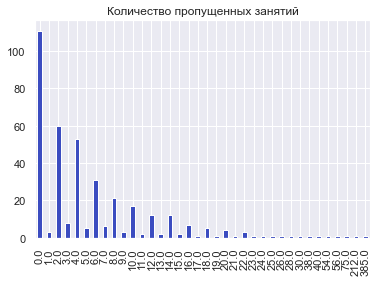

In [205]:
plot_bar_sort(students.absences, 'Количество пропущенных занятий')

Видим, что есть большой "хвост" справа. Расчитаем границы выбросов, чтобы устранить их.

In [61]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))



25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Значит, допустимые значения от 0 до 20. Остальное считаем выбросами и убираем.

In [62]:
students = students.drop(students[students['absences'] > 20].index, axis = 0)

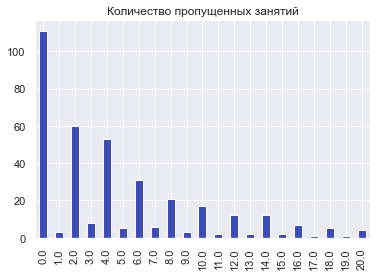

In [63]:
plot_bar_sort(students.absences, 'Количество пропущенных занятий')

Теперь данные выглядят значительно лучше. Видим, что преобладает четное количество пропусков, скорее всего это связано с тем, что в старших классах уроки обычно сдвоенные.

## score
Баллы по госэкзамену по математике

In [209]:
students.score.value_counts(dropna=False)

50.0     52
55.0     42
0.0      37
75.0     33
60.0     30
70.0     27
65.0     27
40.0     27
45.0     23
80.0     16
30.0     12
90.0     10
35.0      8
25.0      7
NaN       6
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

In [210]:
percent_nan(students.score)

Пропусков 1.63%


Поскольку переменная score является целевой, пропусков в ней быть не должно. Удалим их.

In [64]:
students = students.dropna(axis=0, how='any', subset=['score'])
students.score.value_counts(dropna=False)

50.0     54
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
40.0     28
70.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

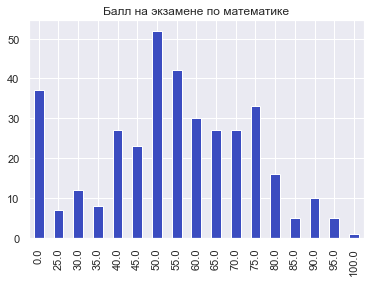

In [212]:
plot_bar_sort(students.score, 'Балл на экзамене по математике')

Видим большое количество нулевых баллов. Это может быть как ошибкой в данных, так и провалом на экзамене. Однако, с учетом того, что 25 - первый положительный балл, скорее всего, это был необходимый порог зачета, и студентам, набравшим баллы ниже 25, проставлялся 0. Поэтому у распределения и получился нетипичный для нормального пик в начале. В связи с этим, не будем исключать из датафрейма студентов, получивших 0 баллов на экзамене.

Построим гистограмму распределения нашего целевого признака.

/Users/Irina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

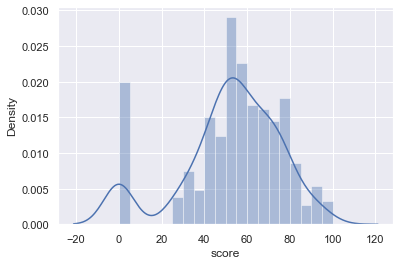

In [65]:
sns.distplot(students['score'], bins=20)

В целом распределение близко к нормальному, если не обращать внимание на количество нулевых баллов. Но как говорилось выше, скорее всего, объединили всех учеников, чьи баллы были "размазаны" между 0 и 25.

In [217]:
students.score.describe()

count    325.000000
mean      58.276923
std       15.975007
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Очистку данных мы закончили. Теперь можно приступать непосредственно к анализу.

## Анализ количественных переменных.

In [137]:
students.corr() # Строим матрицу корреляции для количественных параметров

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.156675,-0.164225,0.069424,-0.014416,0.181867,0.014416,0.055019,0.035454,0.143955,-0.051932,0.136129,-0.171702
Medu,-0.156675,1.000000,0.616067,-0.168478,0.101859,-0.251999,-0.101859,-0.004308,0.067942,0.052201,-0.045427,0.118103,0.218342
Fedu,-0.164225,0.616067,1.000000,-0.131311,0.024650,-0.300482,-0.024650,-0.014476,0.013413,0.025156,0.014250,-0.003954,0.130489
traveltime,0.069424,-0.168478,-0.131311,1.000000,-0.104515,0.056915,0.104515,-0.022464,-0.003707,0.033367,-0.007213,-0.063166,-0.071046
studytime,-0.014416,0.101859,0.024650,-0.104515,1.000000,-0.192545,-1.000000,0.038749,-0.129344,-0.044204,-0.082259,-0.037688,0.121601
failures,0.181867,-0.251999,-0.300482,0.056915,-0.192545,1.000000,0.192545,-0.028048,0.080040,0.081687,0.105785,0.075238,-0.353602
"studytime, granular",0.014416,-0.101859,-0.024650,0.104515,-1.000000,0.192545,1.000000,-0.038749,0.129344,0.044204,0.082259,0.037688,-0.121601
famrel,0.055019,-0.004308,-0.014476,-0.022464,0.038749,-0.028048,-0.038749,1.000000,0.178120,0.066788,0.087069,-0.087400,0.071751
freetime,0.035454,0.067942,0.013413,-0.003707,-0.129344,0.080040,0.129344,0.178120,1.000000,0.291808,0.059721,0.092119,0.033081
goout,0.143955,0.052201,0.025156,0.033367,-0.044204,0.081687,0.044204,0.066788,0.291808,1.000000,-0.012642,0.144757,-0.116532


<AxesSubplot:>

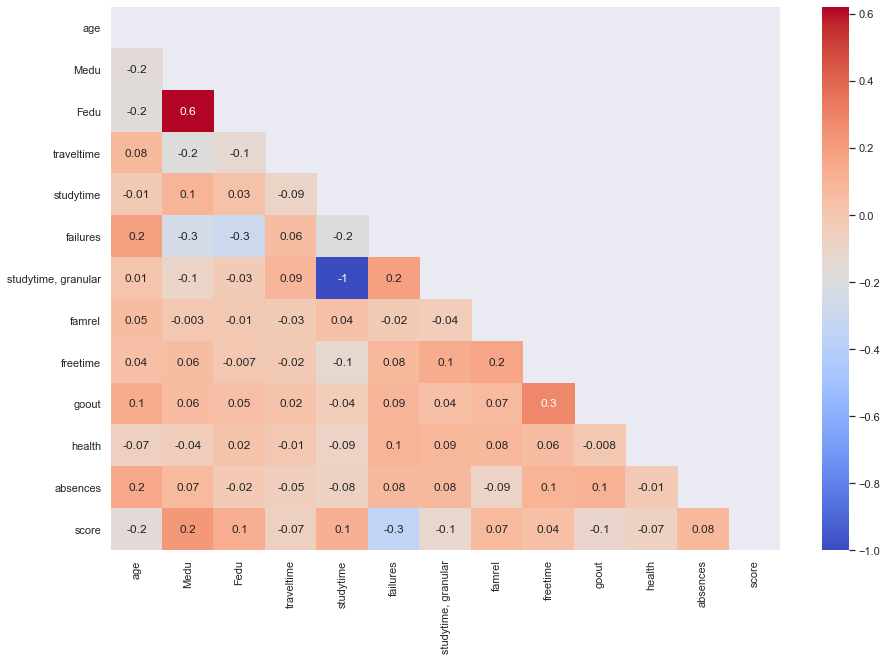

In [66]:
# Строим тепловую карту для количественных переменных

plt.subplots(figsize=(15,10)) #Выбираем масштаб больше, т.к. признаков много
matrix = np.triu(students.corr())
sns.heatmap(students.corr(), annot = True, fmt='.1g', cmap= 'coolwarm', mask = matrix)

Наболее сильное влияние на целевую переменную score оказывают age, Medu, failures. 

Видим полностью скоррелированные переменные 'studytime, granular' и 'studytime'. Одну из них можно удалять.

Также достаточно сильная корреляция наблюдается между переменными Medu, Fedu. Вероятно, это можно объяснит тем, что обычно люди выбирают себе супруга с похожим уровнем образования. Поэтому объединим эти переменные в одну - образование родителей Pedu. 

Связаны также переменные 'goout' и 'freetime', но их мы не будем включать в модель, поскольку влияние на целевой параметр не такое сильное.

#### Для построения модели возьмем количественные параметры age, Pedu (объединенные Medu и Fedu), failures, они оказывают наибольшее влияние на целевой параметр score.

In [140]:
#Объединим образование матери и отца в один столбец - образование родителей
students['Pedu'] = students['Fedu'] + students['Medu']

## Анализ номинативных переменных.

Проанализируем влияние номинативных переменных на целевой парамет score. Для этого сначала построим необходимые графики.

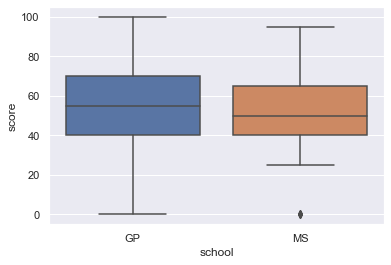

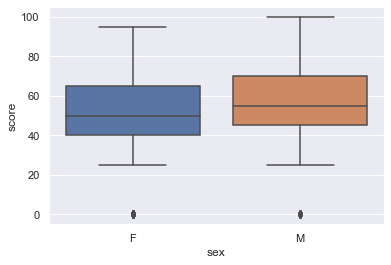

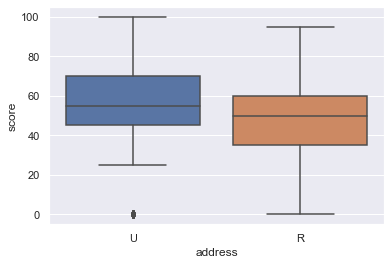

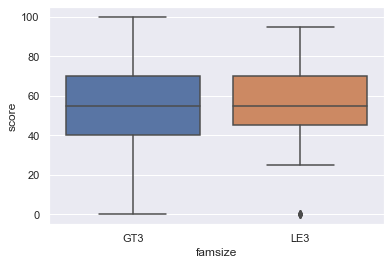

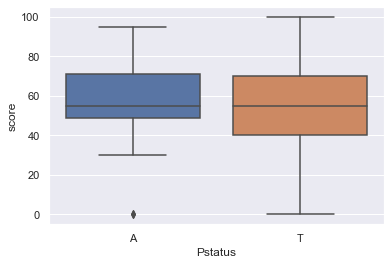

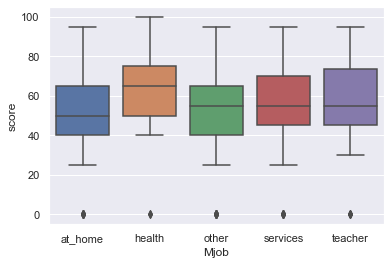

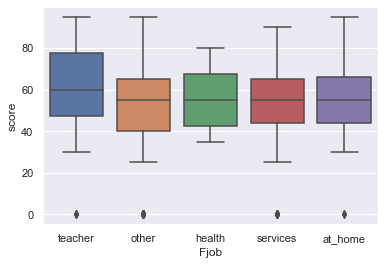

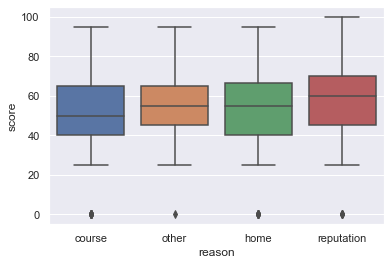

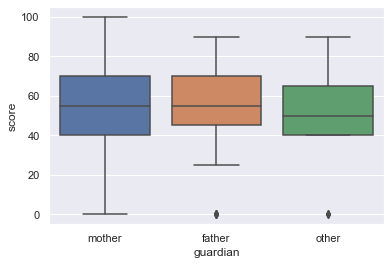

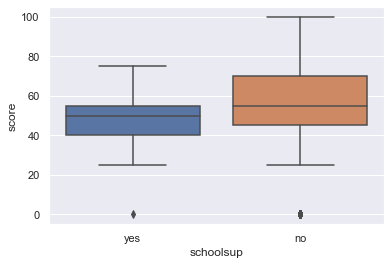

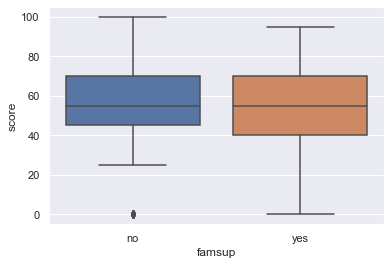

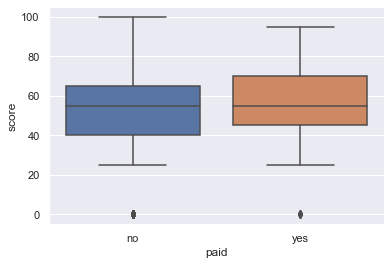

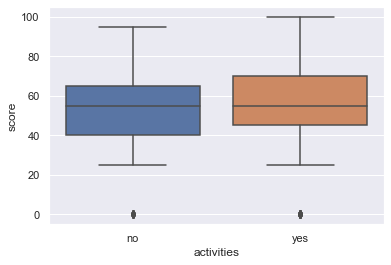

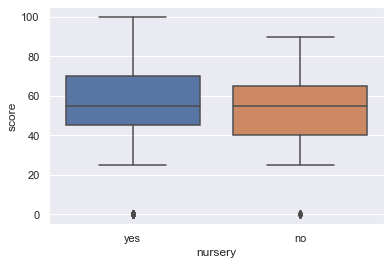

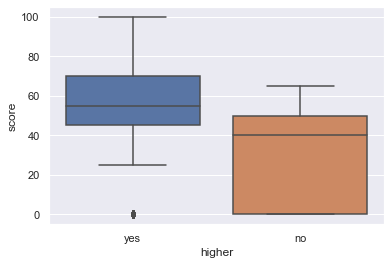

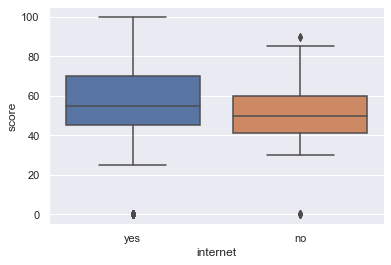

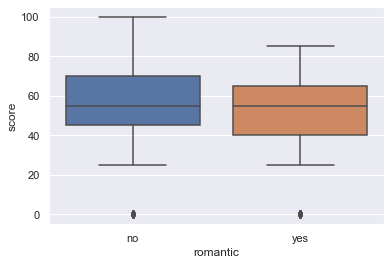

In [69]:
columns = ['school','sex','address', 'famsize','Pstatus','Mjob','Fjob','reason','guardian',
          'schoolsup', 'famsup','paid','activities','nursery','higher','internet','romantic']
for column in columns: 
    get_boxplot(column)

  Визуально наиболее сильное влияние на целевой параметр оказывают параметры sex, address, Mjob, Fjob, schoolsup, higher.
 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
  Проверим нулевую гипотезу о том, что распределения оценок студентов по различным параметрам неразличимы.

In [72]:
columns = ['school','sex','address', 'famsize','Pstatus','Mjob','Fjob','reason','guardian',
          'schoolsup', 'famsup','paid','activities','nursery','higher','internet','romantic']
for column in columns: 
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


#### Для построения модели возьмем следующие номинативные параметры:
 - sex, address, paid, higher, romantic, полученные с помощью теста Стюдента;
 - Mjob, Fjob, schoolsup, определенные визуально с помощью графиков

## Создание нового датафрейма для модели

In [143]:
students_new = students[['failures','age', 'Pedu',
                         'sex','address','Mjob','Fjob','schoolsup','higher','paid','romantic',
                         'score']]
students_new

,failures,age,Pedu,sex,address,Mjob,Fjob,schoolsup,higher,paid,romantic,score
0,0.0,18,8.0,F,U,at_home,teacher,yes,yes,no,no,30.0
1,0.0,17,2.0,F,U,at_home,other,no,yes,no,no,30.0
2,3.0,15,2.0,F,U,at_home,other,yes,yes,NaN,NaN,50.0
3,0.0,15,6.0,F,U,health,NaN,no,yes,yes,yes,75.0
4,0.0,16,6.0,F,U,other,other,no,yes,yes,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,1.0,18,2.0,F,U,other,other,no,yes,no,no,0.0
391,0.0,17,4.0,M,U,services,services,no,yes,no,no,80.0
392,3.0,21,2.0,M,R,other,other,NaN,NaN,no,no,35.0
393,0.0,18,5.0,M,R,services,other,no,yes,no,no,50.0


## Выводы

1. Была проведена первичная обработка данных, устранены выбросы:
    - для колонки Fedu значение 40.0 заменено на 4.0 (заданный диапазон значений для колонки от 0 до 4);
    - для колонки famrel значение -1.0 заменено на 1.0 (заданный диапазон значений для колонки от 1 до 5);
    - для колонки absences обнаружены большие отклонения, поэтому были определены границы выбросов и выходящие за рамки значения удалены;
    - в колонках Pstatus, famsup, paid обнаружено большое количество пропусков (10% и более), которые заменены на модальное значение соответсвующего параметра;
    - для целевой переменной score были удалены все пропуски.    
2. Был проведен  корреляционный анализ количественных переменных: 
    - построены матрица корреляции и тепловая карта;
    - выявлены полностью скоррелированные переменные 'studytime, granular' и 'studytime';
    - принято решение объединить переменные Medu и Fedu в одну - образование родителей Pedu;
    - отобраны количественные переменные, которые оказывают наибольшее влияние на целевой параметр score.   
3. Были проанализированы номинативные переменные:
    - построены графики типа boxplot;
    - проведены тесты Стьюдента для нахождения статистически значимых различий для колонок;
    - отобраны номинативные переменные, которые оказывают наибольшее влияние на целевой параметр score.
4. В результате отобраны параметры с наибольшим влиянием на целевой параметр score:
    - количественные переменные age, Pedu, failures;
    - номинативные переменные sex, address, paid, higher, romantic, Mjob, Fjob, schoolsup.